# Proyecto Sprint 10.
## Paso 1. Acceda los datos y prepáralos para el análisis.
Datos utilizados en la primera parte del proyecto:

/datasets/hypotheses_us.csv

Datos utilizados en la segunda parte del proyecto:

/datasets/orders_us.csv

/datasets/visits_us.csv

### Inicializacion

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

### Cargar los datos.

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

### Preparar los datos del df de hypotheses.

In [3]:
print(hypotheses.head(),'\n')
print(hypotheses.info(), '\n')
print(hypotheses.describe(), '\n')
print(hypotheses.duplicated().sum(), '\n')

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0

Una vez vistos los datos correspondientes a "hypothesis", podemos ver que los tipos de datos de las cinco columnas son correctos, esto debido a que, en la columna "Hypothesis" el tipo de datos que tiene es el de "object", lo cual es correcto puesto que tiene contenido de tipo object, luego en segundo lugar tenemos las columnas "Reach", "Impact", "Confidence" y "Effort", en donde podemos ver que tienen el tipo de datos "int64", lo cual es correcto.

No podemos identificar valores nulos, asi como tampoco se pueden ver que duplicados.

### Prepara los datos del df de orders.

In [4]:
print(orders.head(),'\n')
print(orders.info(),'\n')
print(orders.describe(),'\n')
print(orders.duplicated().sum(),'\n')

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None 

       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03   1197.000000
mean    2.155621e+09  2.165960e+09    131.491646
std     1.229085e+09  1.236014e

Una vez vistos los datos correspondientes a "orders", podemos ver que los tipos de datos de cuatro de las cinco columnas son incorrectos, esto debido a que, en la columna "transactionId" que de nuevo esta en tipo de datos "int64" cuando deberia de tener el tipo de datos de "uint64", tal y como sucede con la columna "visitorId", por ultimo tenemos la columna "date" que tiene el tipo de datos "object" y deberia de tener el tipo de datos "datetime".

Del mismo modo podemos ver que no hay duplicados, ni tampoco hay valores nulos.

In [5]:
# Cambiamos el tipo de datos de las columnas.
orders['transactionId'] = orders['transactionId'].astype('uint64')
orders['visitorId'] = orders['visitorId'].astype('uint64')
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')
# Mostramos el resultado.
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   uint64        
 1   visitorId      1197 non-null   uint64        
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1), uint64(2)
memory usage: 46.9+ KB
None


### Prepara los datos del df de visits.

In [6]:
print(visits.head(),'\n')
print(visits.info(),'\n')
print(visits.describe(),'\n')
print(visits.duplicated().sum(),'\n')

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None 

           visits
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000 

0 



Una vez vistos los datos correspondientes a "visits", podemos ver que el tipo de datos de una de las tres columnas es incorrecto, esto debido a que, en la columna "date" que tiene el tipo de datos "object" y deberia de tener el tipo de datos "datetime".

Del mismo modo podemos ver que no hay duplicados, ni tampoco hay valores nulos.

In [7]:
# Cambiamos el tipo de datos de las columnas.
visits['date'] = pd.to_datetime(visits['date'], format = '%Y-%m-%d')
# Mostramos el resultado.
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


## Parte 1. Priorizar hipótesis
El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda online con Reach, Impact, Confidence y Effort especificados para cada una.

El ejercicio consiste en:

- Aplicar el framework ICE para priorizar hipótesis. 
- Ordenarlas en orden descendente de prioridad.
- Aplicar el framework RICE para priorizar hipótesis. 
- Ordenarlas en orden descendente de prioridad.
- Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. 
- Proporcionar una explicación de los cambios.

### Aplicar el framework ICE para priorizar hipótesis y ordenarlas en orden descendente de prioridad.

In [8]:
# Aplicaremos el framework RICE para priorizar la hipotesis y posteriormente ordenaremos en orden descendente de prioridad.
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
print(hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


El ICE presenta la 8, 0, 7 y 6 como las hipótesis más prometedoras. 

### Aplicar el framework RICE para priorizar hipótesis y odenarlas en orden descendente de prioridad.

In [9]:
# Aplicaremos el framework RICE para priorizar la hipotesis y posteriormente ordenaremos en orden descendente de prioridad.
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
print(hypotheses[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


El RICE presenta la 7, 2, 0 y 6 como las hipótesis más prometedoras.

### Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE, asi como tambien proporcionar una explicación de los cambios.

Una vez vistos los dos frameworks ICE y RICE podemos identificar varias diferencias entre ellos, para empezar podemos ver que la hipótesis numero 8 que tiene el puesto 1 en ICE, pero en RICE ocupa el puesto numero 5, en segundo lugar tenemos otra diferencia, la cual es que el puesto numero 3 en ICE que es la hipótesis numero 7 en RICE tiene el puesto numero 1, con base en ello es que podemos ver que la priorización tiene un fuerte enfoque en el alcance, luego podemos ver que la hipótesis numero 0 tiene el puesto numero 2 en ICE y el puesto numero 3 en RICE, en este caso no vimos tanta diferencia, pero en el caso de la hipótesis numero 2 que el ICE esta en el puesto numero 5, en RICE se coloca en el lugar numero 2, la hipótesis numero 6 se mantiene en el lugar numero 4 en ambos frameworks. 

Con base en lo anterior podemos ver que en RICE la hipótesis 0 ocupa uno de los lugares mas altos en RICE en comparación con lo que pasa con la hipótesis numero 8 que cayo de estar en el puesto numero 1 en ICE al numero 5 en RICE, por lo que podemos ver que hay grandes diferencias entre el enfoque de los dos frameworks. 

Es importante entender que ambas priorizaciones son importantes y útiles, sin embargo, cada una tiene sus utilidades diferentes ya que ICE puede ser mas funcional si el objetivo final es maximizar el impacto y la confianza mientras se minimiza el esfuerzo, puesto que este se enfoca en el Impacto, la Confianza y el Esfuerzo. Por otro lado podemos ver que RICE es mas funcional en el caso de que el objetivo sea maximizar el impacto a la mayor cantidad de usuarios posibles. 

Por ultimo, tomando en cuenta las evaluaciones de ambos marcos, es importante llamar a la reflexión sobre el tipo de impacto que se busca generar y el alcance que quieren lograr. Si bien RICE parece dar una mayor prioridad a las hipótesis con gran alcance, ICE está más orientado a optimizar el impacto a menor costo. Es importante que las decisiones de priorización no solo se basen en estos valores numéricos, sino que también consideren factores cualitativos, como la alineación con los objetivos estratégicos y el valor potencial a largo plazo de cada hipótesis.

## Parte 2. Análisis del test A/B
Realizaste una prueba A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visits_us.csv.

Ejercicio

Analiza el test A/B:

### Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

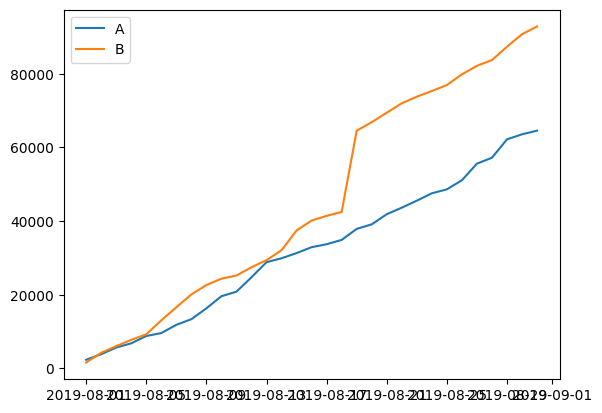

In [10]:
# Crearemos una matriz con valores únicos de parejas fecha-grupo
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

# A continuación, usamos la matriz de combinaciones únicas de fecha y grupo para obtener los datos diarios acumulados agregados sobre los pedidos.
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max', 
'group' : 'max',
'transactionId' : pd.Series.nunique, 
'visitorId' : pd.Series.nunique, 
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Ahora obtenemos los datos diarios acumulados agregados sobre los visitantes.
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group': 'max', 'visits': 'sum'}), axis = 1).sort_values(by=['date', 'group'])

# Ahora fusionaremos las dos tablas en una y le daremos a sus columnas nombres descriptivos.
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

# Crearemos un DataFrame con pedidos acumulados e ingresos acumulados por dia para el grupo A.
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

# Del mismo modo que el paso anterior, crearemos un DataFrame con pedidos acumulados e ingresos acumulados por dia para el grupo B.
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

# Trazaremos el grafico de ingresos del grupo A.
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label ='A')
# Trazaremos el grafico de ingresos del grupo B.
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.legend()


Haz conclusiones y conjeturas.

En conclusion, podemos decir que ambos grupos han tenido un crecimiento sostenido a lo largo del tiempo, sin embargo tambien se puede ver claramente como es que el grupo B tuvo un crecimiento que hizo que su ganancia se incrementara fuertemente en comparacion con la del grupo A, y a causa de ello la curva de B se separo de la de A, a pesar de que podemos ver que luego el crecimiento de ambas se mantiene en la misma magnitud, pero con diferencias notables en las cantidades. Por lo anterior se puede decir que la estrategia empleada en el grupo B es funcional para poder incrementar las ganancias de manera rapida y significativa al menos en el tiempo que se muestra en el grafico, esto debido a su notable incremento en las ganancias en comparacion con lo que pasa con la curva de A.

### Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

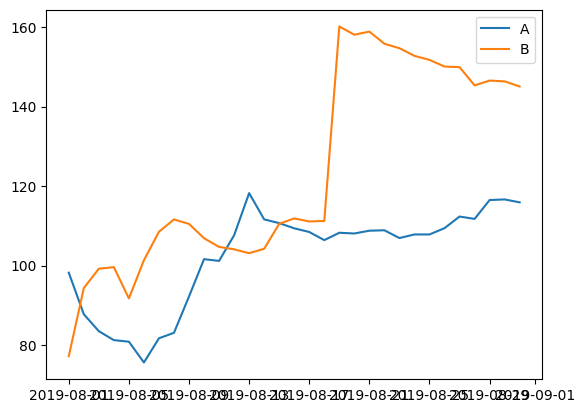

In [11]:
# Trazaremos el grafico del tamaño del pedido promedio acumulado del grupo A.
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label = 'A')
# Trazaremos el grafico del tamaño del pedido promedio acumulado del grupo B.
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label = 'B')
plt.legend()

Haz conclusiones y conjeturas.

En conclusion podemos decir que a pesar de que las ganancias se hayan incrementado en el grupo B, este incremento parece ser que fue solo un "shock" de compra, ya que con el paso del tiempo podemos darnos cuenta de que el promedio de compra de B no fue constantemente positivo. Aunque B si tuvo un incremento significativo que lo posiciono muy por encima del promedio del grupo A en un punto en el tiempo, eso no impidió que poco después comenzara a decaer con una tendencia negativa. 
A diferencia del promedio del grupo A, que aunque demostró no ser tan volátil, mantiene un crecimiento positivo a lo largo del tiempo, sin tantas fluctuaciones, mas bien con un comportamiento positivo mas constante.

Es por ello que viendo el grafico a lo largo del tiempo, podría ser mas funcional seguir con la estrategia optada por el grupo A en lugar de la del grupo B debido a la estabilidad que el grupo A muestra con mantener un crecimiento constante a lo largo del tiempo, a diferencia de lo que pasa en el grupo B, que aunque tuvo un impacto inicial muy positivo, no se puede ver que hay una consistencia en el largo plazo.

### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

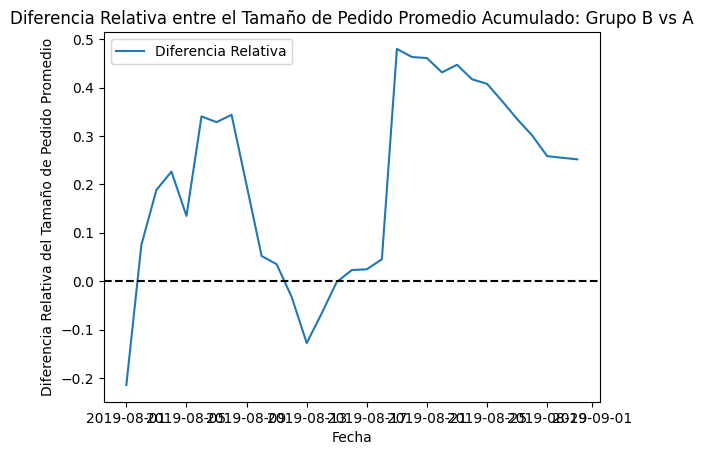

In [12]:
# Reuniremos los datos en un DataFrame.
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

# Ahora trazaremos un grafico de diferencia relativa entre el tamaño de compra promedio acumulado en el grupo B en comparacion con el del grupo A.
plt.plot(
    mergedCumulativeRevenue['date'],    
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])
    /(mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1,
    label="Diferencia Relativa"
)
# Agregaremos el eje X.
plt.axhline(y=0, color='black', linestyle = '--')

# Agregar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa del Tamaño de Pedido Promedio')
plt.title('Diferencia Relativa entre el Tamaño de Pedido Promedio Acumulado: Grupo B vs A')

# Mostramos la leyenda
plt.legend()  # Aquí se debe asociar la etiqueta al gráfico

# Mostrar el gráfico
plt.show()


Saca conclusiones y haz conjeturas.

En conclusion podemos decir que la diferencia relativa entre el tamaño de pedido promedio acumulado entre el grupo B y el grupo A muestra una gran volatibilidad, con grandes fluctuaciones a lo largo del tiempo. Esta volatibilidad puede estar relacionada compras anormalmente grandes que pudieron ocasionar esos grandes picos. 

### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

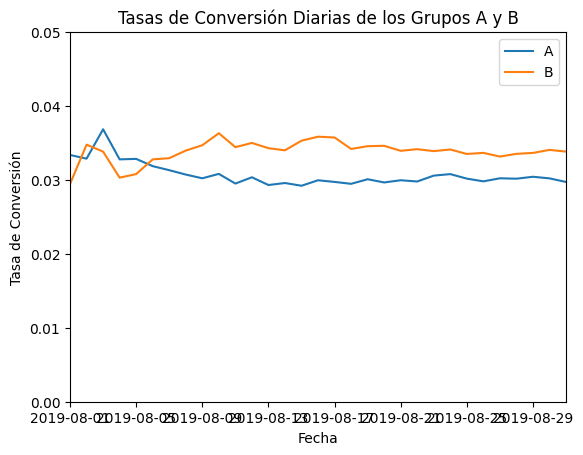

In [13]:
# Calculamos la conversion acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']
#seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#seleccionamos datos en el grupo B 
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Trazamos los graficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
plt.legend()

# Establecer el rango de fechas automáticamente
min_date = cumulativeData['date'].min()
max_date = cumulativeData['date'].max()

# Establecer la escala de los ejes con el rango automático de fechas
plt.axis([min_date, max_date, 0, 0.05])

# Etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.title('Tasas de Conversión Diarias de los Grupos A y B')

# Mostramos el gráfico
plt.show()

Saca conclusiones y haz conjeturas.

Una vez visto el grafico se puede concluir con que ambos grupos, tanto el B como el A tienen tasas de conversion muy similares a lo largo del tiempo. Sin embargo, es claro que al final ambas curvas van convergiendo, puesto que se ve que la del grupo B va cayendo gradualmente, mientras que la del grupo A se mantiene constante pero creciendo a lo largo del tiempo. Es por ello que podemos inferir que la tasa de conversion del grupo A es ligeramente mayor que la del grupo B.

### Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

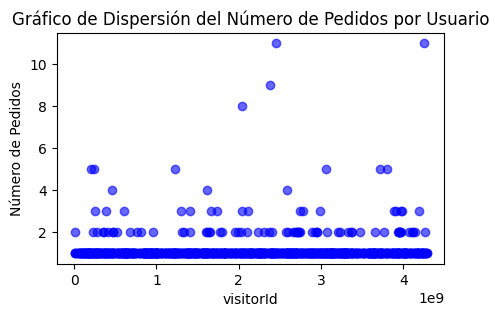

In [14]:
# Agrupar el número de pedidos por usuario
orders_per_user = orders.groupby('visitorId')['transactionId'].nunique().reset_index(name='num_orders')

# Trazar el gráfico de dispersión
plt.figure(figsize=(5,3))
plt.scatter(orders_per_user['visitorId'], orders_per_user['num_orders'], alpha=0.6, color='b')

# Agregar etiquetas y título
plt.xlabel('visitorId')
plt.ylabel('Número de Pedidos')
plt.title('Gráfico de Dispersión del Número de Pedidos por Usuario')

# Mostrar el gráfico
plt.show()

Haz conclusiones y conjeturas.

En conclusion, el numero de pedidos por visitante se mantiene cercano al numero 1, sin embargo, también se puede observar que hay usuarios que tienen un comportamiento atipico a lo largo del tiempo, puesto que realizan pedidos atípicos a lo largo del tiempo, llegando a superar los 10 pedidos por usuario. Esto puede significar que un pequeño grupo de usuarios realiza compras repetidas de manera significativa.

### Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [15]:
orders_per_user = orders.groupby('visitorId')['transactionId'].nunique().reset_index(name='num_orders')

orders_per_user.columns = ['visitorId', 'num_orders']

print(orders_per_user.sort_values(by='num_orders', ascending=False).head(10),'\n')

print(np.percentile(orders_per_user['num_orders'], [95, 99])) 

       visitorId  num_orders
1023  4256040402          11
591   2458001652          11
569   2378935119           9
487   2038680547           8
44     199603092           5
744   3062433592           5
55     237748145           5
917   3803269165           5
299   1230306981           5
897   3717692402           5 

[2. 4.]


Define el punto en el cual un punto de datos se convierte en una anomalía.

Un valor se considera una anomalía si este supera el percentil 99. Por lo tanto, el punto en el cual los pedidos se convierten en una anomalia es cuando los usuarios hacen 4 o mas pedidos.

### Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
1196     3936777065  2108080724 2019-08-15   3120.1     B
858       192721366  1316129916 2019-08-27   1450.2     A
1136      666610489  1307669133 2019-08-13   1425.8     A
744      3668308183   888512513 2019-08-27   1335.6     B
662      1811671147  4266935830 2019-08-29   1220.2     A
682      1216533772  4266935830 2019-08-29   1220.2     B
743      3603576309  4133034833 2019-08-09   1050.0     A
1103     1348774318  1164614297 2019-08-12   1025.8     A
1099      316924019   148427295 2019-08-12   1015.9     A


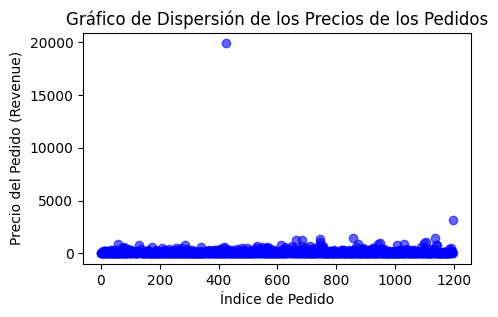

In [16]:
# Mostraremos los 10 pedidos con mayor ingreso
print(orders.sort_values(by='revenue', ascending=False).head(10))

# Crearemos un rango de números desde 0 hasta el número de observaciones
x_values = pd.Series(range(0, len(orders)))

# Trazaremos el gráfico de dispersión de los precios de los pedidos
plt.figure(figsize=(5,3))  
plt.scatter(x_values, orders['revenue'], alpha=0.6, color='b')
plt.xlabel('Índice de Pedido')
plt.ylabel('Precio del Pedido (Revenue)')
plt.title('Gráfico de Dispersión de los Precios de los Pedidos')
plt.show()

Haz conclusiones y conjeturas.

En conclusion en el grafico de dispersion de los precios de los pedidos, se puede observar que la mayoría de los pedidos generan ingresos ligeramente superiores a cero, y se mantienen muy por debajo de los 5000. Sin embargo, tambien se pueden identificar dos puntos atípicos, que muestran ingresos significativamente mas altos, con valores de aproximadamente 20000 y 5000 respectivamente. 

### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [17]:
print(orders.head(10),'\n')
print(np.percentile(orders['revenue'], [95, 99]))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
5      182168103   935554773 2019-08-15     35.0     B
6      398296753  2900797465 2019-08-15     30.6     B
7     2626614568    78758296 2019-08-15     20.1     A
8     1576988021   295230930 2019-08-15    215.9     A
9     1506739906  1882260405 2019-08-15     30.5     B 

[435.54  900.904]


Define el punto en el cual un punto de datos se convierte en una anomalía.

Un valor se considera una anomalía si este supera el percentil 99. Por lo tanto, el punto en el cual los datos se convierten en una anomalia es cuando los ingresos por transaccion son mayores a 900.904.

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [18]:
# Número de pedidos por usuario en grupo A
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

# Número de pedidos por usuario en grupo B
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

# Crear las muestras con ceros para los usuarios sin pedidos
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

# Realizamos la prueba de Mann-Whitney
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]

# Calcular la diferencia relativa entre las medias
mean_difference = sampleB.mean() / sampleA.mean() - 1

# Resultados
print(f"Valor p de la prueba de Mann-Whitney: {p_value:.3f}")
print(f"Diferencia relativa entre las medias: {mean_difference:.3f}")

Valor p de la prueba de Mann-Whitney: 0.017
Diferencia relativa entre las medias: 0.138


Haz conclusiones y conjeturas.

Una vez hechas las pruebas necesarias para determinar la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto, podemos concluir que si hay una diferencia estadísticamente significativa entre los grupos, puesto que el valor p de la prueba de Mann-Whitney es 0.017, lo cual es menor que el umbral de 0.05.

Del mismo modo podemos observar que el grupo B tiene una tasa de conversion de 13.8% mayor en comparación con el grupo A. Esto puede significar que la estrategia implementada en el grupo B tiene un impacto positivo en relación a la conversion, aunque la diferencia entre los grupos no sea muy grande.

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [19]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


Haz conclusiones y conjeturas.

Una vez realizadas las pruebas necesarias para determinar la significancia estadística de la diferencia en el tamaño promedio del pedido entre los grupos utilizando los datos en bruto, podemos concluir que no hay una diferencia estadísticamente significativa entre los grupos, ya que el valor p de la prueba Mann-Whitney es de 0.692, lo cual es mayor que el umbral de 0.05.

Sin embargo, por otro lado, podemos observar que el grupo B tiene un tamaño promedio superior al de A en un 25.2%. A pesar de esta diferencia, no podemos afirmar que sea significativa debido a la falta de evidencia estadistica.

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [20]:
# Filtramos los usuarios con más de 4 pedidos
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

# Seleccionamos usuarios con más de 4 pedidos en cada grupo
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'], 
     ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis=0
)

# Seleccionamos usuarios con ingresos superiores a 900.90
usersWithExpensiveOrders = orders[orders['revenue'] > 900.90]['visitorId']

# Concatenamos ambos sets de usuarios anómalos, eliminamos duplicados y ordenamos
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

# Imprimimos los primeros 5 usuarios anómalos y el número total de usuarios anómalos
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

# Filtramos los datos para eliminar los usuarios anómalos
ordersFilteredA = orders[~orders['visitorId'].isin(abnormalUsers[abnormalUsers.isin(orders[orders['group'] == 'A']['visitorId'])])]
ordersFilteredB = orders[~orders['visitorId'].isin(abnormalUsers[abnormalUsers.isin(orders[orders['group'] == 'B']['visitorId'])])]

# Ahora podemos realizar las pruebas de significancia en los datos filtrados
sampleA = ordersFilteredA.groupby('visitorId').agg({'transactionId': pd.Series.nunique}).reset_index()
sampleB = ordersFilteredB.groupby('visitorId').agg({'transactionId': pd.Series.nunique}).reset_index()

# Renombramos la columna 'transactionId' a 'orders' para que sea más claro
sampleA = sampleA.rename(columns={'transactionId': 'orders'})
sampleB = sampleB.rename(columns={'transactionId': 'orders'})

# Prueba de Mann-Whitney
p_value_conversion = stats.mannwhitneyu(sampleA['orders'], sampleB['orders'])[1]

# Diferencia relativa entre las medias
mean_difference_conversion = sampleB['orders'].mean() / sampleA['orders'].mean() - 1

# Imprimimos resultados de significancia y diferencia relativa
print(f"Valor p de la prueba de Mann-Whitney: {p_value_conversion:.3f}")
print(f"Diferencia relativa entre las medias: {mean_difference_conversion:.3f}")

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: uint64
(15,)
Valor p de la prueba de Mann-Whitney: 0.995
Diferencia relativa entre las medias: -0.000


Haz conclusiones y conjeturas.

Una vez realizadas las pruebas necesarias para determinar la significancia estadistica de la diferencia en la conversion entre los grupos utilizando los datos filtrados, podemos concluir que no hay una diferencia estadisticamente significativa entre los grupos, ya que el valor p de la prueba Mann-Whitney es de 0.995, lo cual es mayor que el umbral de 0.05.

Del mismo modo al observar la diferencia relativa entre medias de -0.000, podemos inferir que no hay una diferencia notable en el numero de pedidos entre ambos grupos, ya que el valor cercano a cero implica que los grupos tienen un comportamiento muy similar en términos de conversion, siempre y cuando los datos anómalos sean excluidos de la prueba.

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [21]:
# Prueba de Mann-Whitney para el tamaño promedio del pedido (revenue)
p_value_revenue = stats.mannwhitneyu(
    ordersFilteredA['revenue'], ordersFilteredB['revenue']
)[1]

# Diferencia relativa entre las medias del tamaño promedio del pedido
mean_difference_revenue = (
    ordersFilteredB['revenue'].mean() / ordersFilteredA['revenue'].mean() - 1
)

# Imprimimos resultados
print(f"Valor p de la prueba de Mann-Whitney: {p_value_revenue:.3f}")
print(f"Diferencia relativa entre las medias: {mean_difference_revenue:.3f}")

Valor p de la prueba de Mann-Whitney: 0.972
Diferencia relativa entre las medias: -0.141


Haz conclusiones y conjeturas.

Una vez realizadas las pruebas necesarias para determinar la significancia estadística de la diferencia en el tamaño entre los grupos utilizando los datos filtrados, podemos concluir que no hay una diferencia estadisticamente significativa entre los grupos, ya que el valor p de la prueba Mann-Whitney es de 0.972, lo cual es mayor que el umbral de 0.05.

Del mismo modo, al observer la diferencia relativa entre las medias de -0.141, podemos inferir que el tamaño promedio de los pedidos en el grupo B es un 14.1% menor que en el grupo A.

### Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

La decision que tomo basada en los resultados de las pruebas es la numero 2: parar la prueba y concluir que no hay diferencias significativas entre los grupos. Esta decision la tomo con base en los resultados obtenidos, donde incluso despues de ver que no hay anomalias, no se encontro evidencia estadistica suficiente para poder afirmar una diferencia significativa en la conversion ni en el tamaño de las ordines entre los grupos.

Los valores p de las pruebas de Mann-Whitney fueron persistentemente mayores al umbral del 0.05, lo que confirma que cualquier diferencia observada podria ser atribuida al azar y no necesariamente a una razon estadisticamente racional. Es por todo lo anterior que se puede concluir que continuar con la prueba no seria una decision eficiente, ya que no se espera obtener informacion suficientemente relevante en el future.